<a href="https://colab.research.google.com/gist/akashthota/ffe16ce40833dce38243afe1e3a8a808/data_preprocessing_for_restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import numpy
import os
from PIL import Image
 

In [ ]:
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
import os
import tensorflow as tf
 
 
%matplotlib inline

In [ ]:
def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = 2 # size of spot is 1/20 of smallest dimension
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

In [ ]:
def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img

In [ ]:
def contrast(img):
  img=tf.image.random_contrast(img, 0.5, 0.7)
  return img


In [ ]:
def pepper_noise(img):
  noise_factor = 0.08
  input_image = img + noise_factor * tf.random.normal(img.shape)
  input_image = tf.squeeze(tf.clip_by_value(input_image, clip_value_min=0., clip_value_max=1.))
  return input_image

In [ ]:
def gaussian_noise(image):
    with tf.name_scope('Add_gaussian_noise'):
        noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=(50)/(255), dtype=tf.float32)
        noise_img = image + noise
        noise_img = tf.clip_by_value(noise_img, 0.0, 1.0)
    return noise_img

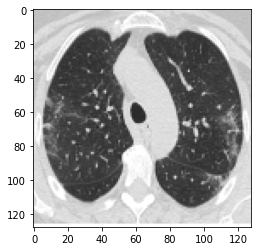

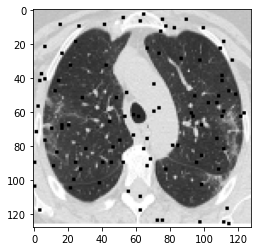

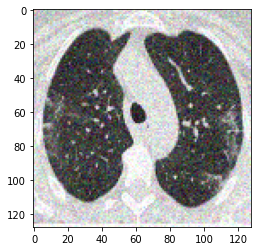

In [ ]:
x1 = []    
y1 = []
loaded_images1 = []
#### EXAMPLE ####
#img = Image.open('/content/drive/MyDrive/project/sarscov2_ctscan/COVID/Covid (1).png')
#img.load()
#img = make_square(img)
#img = img.resize((128,128), Image.ANTIALIAS)
image = tf.io.read_file('/content/drive/MyDrive/project/sarscov2_ctscan/COVID/Covid (1).png')
img = tf.image.decode_png(image , channels=3)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [128, 128])

loaded_images1.append(img)
plt.figure()
plt.imshow(img)

#i = np.random.randint(len(loaded_images))
#img = loaded_images[0]
img_array = np.asarray(img)
#cols, rows = img.size

# Add noise
img_array_noise = add_noise(img_array)   
plt.figure()
plt.imshow(img_array_noise)

img_array_noise = pepper_noise(img_array)
plt.figure()
plt.imshow(img_array_noise)

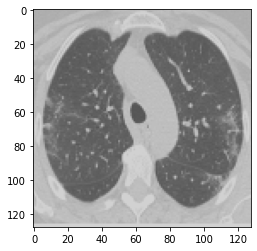

In [ ]:
img_array_noise = contrast(img_array)
plt.figure()
plt.imshow(img_array_noise)

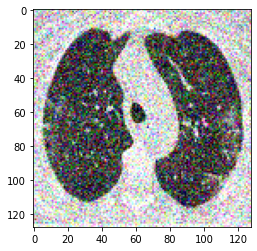

In [ ]:
img_array_noise = gaussian_noise(img_array)
plt.figure()
plt.imshow(img_array_noise)

In [ ]:
import pickle

os.chdir('/content/drive/MyDrive/project')
if 'data.pkl' in os.listdir():
  data=1
  file = open("/content/drive/MyDrive/project/data.pkl", "rb");
  x = pickle.load(file)
  y = pickle.load(file)
else:
  x = np.array([],dtype=tf.float32)   
  y = np.array([],dtype=tf.float32)
loaded_images = []


In [ ]:
x

array([[[[0.79702824, 0.79702824, 0.79702824],
         [0.79393387, 0.79393387, 0.79393387],
         [0.80939037, 0.80939037, 0.80939037],
         ...,
         [0.82745105, 0.82745105, 0.82745105],
         [0.8181833 , 0.8181833 , 0.8181833 ],
         [0.8196079 , 0.8196079 , 0.8196079 ]],

        [[0.8000001 , 0.8000001 , 0.8000001 ],
         [0.79785544, 0.79785544, 0.79785544],
         [0.8054688 , 0.8054688 , 0.8054688 ],
         ...,
         [0.82745105, 0.82745105, 0.82745105],
         [0.8181833 , 0.8181833 , 0.8181833 ],
         [0.8196079 , 0.8196079 , 0.8196079 ]],

        [[0.8029719 , 0.8029719 , 0.8029719 ],
         [0.79815036, 0.79815036, 0.79815036],
         [0.80392164, 0.80392164, 0.80392164],
         ...,
         [0.82745105, 0.82745105, 0.82745105],
         [0.8181833 , 0.8181833 , 0.8181833 ],
         [0.8196079 , 0.8196079 , 0.8196079 ]],

        ...,

        [[0.808913  , 0.808913  , 0.808913  ],
         [0.81146985, 0.81146985, 0.81146985]

In [ ]:
 for path, subdirs, files in os.walk('/content/drive/MyDrive/project/covidxct/2A_images'):
  for name in files:
    name = os.path.join(path,name)
    print(name,i)
    image = tf.io.read_file(name)
    img = tf.image.decode_png(image , channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [128, 128])
    
    loaded_images.append(img)
    #plt.figure()
    #plt.imshow(img)
 
    #i = np.random.randint(len(loaded_images))
    #img = loaded_images[0]
    img_array = np.asarray(img)
    #cols, rows = img.size
    a=0
    # Add noise
    if a%4==0:
      img_array_noise = add_noise(img_array)
    elif a%4==1:
      img_array_noise = pepper_noise(img_array)
    elif a%4==2:
      img_array_noise = gaussian_noise(img_array)
    else:
      img_array_noise =contrast(img_array)
    #plt.figure()
    a+=1
    #plt.imshow(img_array_noise)
    #print(x)
    x=np.append(x,[img_array],axis=0)
    #print(x)
    y=np.append(y,[img_array_noise],axis=0)

/content/drive/MyDrive/project/covidxct/2A_images/CP_7_3512_0224.png 1
/content/drive/MyDrive/project/covidxct/2A_images/CP_7_3512_0235.png 2
/content/drive/MyDrive/project/covidxct/2A_images/CP_7_3512_0254.png 3
/content/drive/MyDrive/project/covidxct/2A_images/CP_7_3512_0250.png 4
/content/drive/MyDrive/project/covidxct/2A_images/HUST-Patient1-0060.png 5
/content/drive/MyDrive/project/covidxct/2A_images/CP_7_3512_0231.png 6
/content/drive/MyDrive/project/covidxct/2A_images/CP_7_3512_0219.png 7
/content/drive/MyDrive/project/covidxct/2A_images/CP_7_3512_0255.png 8
/content/drive/MyDrive/project/covidxct/2A_images/HUST-Patient1-0068.png 9
/content/drive/MyDrive/project/covidxct/2A_images/CP_7_3512_0294.png 10
/content/drive/MyDrive/project/covidxct/2A_images/CP_8_3513_0040.png 11
/content/drive/MyDrive/project/covidxct/2A_images/CP_7_3512_0295.png 12
/content/drive/MyDrive/project/covidxct/2A_images/CP_7_3512_0202.png 13
/content/drive/MyDrive/project/covidxct/2A_images/HUST-Patient1-0

In [ ]:
x.shape,img_array.shape

((9287, 128, 128, 3), (128, 128, 3))

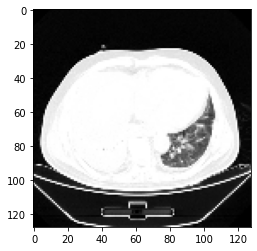

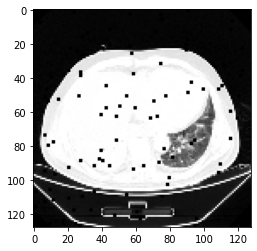

In [ ]:
import pickle
if data != 2:
  plt.figure()
  plt.imshow(x[5001])
  plt.figure()
  plt.imshow(y[5001])
  
  # Write to file.
  file = open("/content/drive/MyDrive/project/data.pkl", "wb")
  pickle.dump(x, file)
  pickle.dump(y, file)
  file.close()

In [ ]:
import pickle
# Read from file.
file = open("/content/drive/MyDrive/project/data.pkl", "rb");
x_train = pickle.load(file)
x_train_noisy = pickle.load(file)
file.close()

In [ ]:
x_train.shape,x_train_noisy.shape

((9287, 128, 128, 3), (9287, 128, 128, 3))

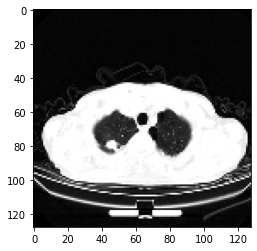

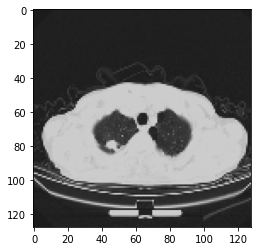

In [ ]:
plt.figure()
plt.imshow(x_train[9286])
plt.figure()
plt.imshow(x_train_noisy[9286])